# 1. 데이터 불러오기

In [1]:
# 패키지 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

In [2]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
# Pandas 출력 최대치 설정, 열41개, 행 20개
pd.set_option('max_columns', 41,'max_rows', 50) 

In [4]:
# Window의 기본 인코딩은 cp949 
# 상황에 맞게 수정
df = pd.read_csv('Auction_master_train.csv')

In [5]:
df.shape

(1933, 41)

# 2. 데이터 탐색

In [6]:
# 데이터의 첫 5개 값 확인
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [7]:
# 데이터 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [8]:
# 데이터의 요약 통계 확인
# 연속형 변수의 통계만 나옴
df.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


# 3. 결측값 처리

In [9]:
df.isnull().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

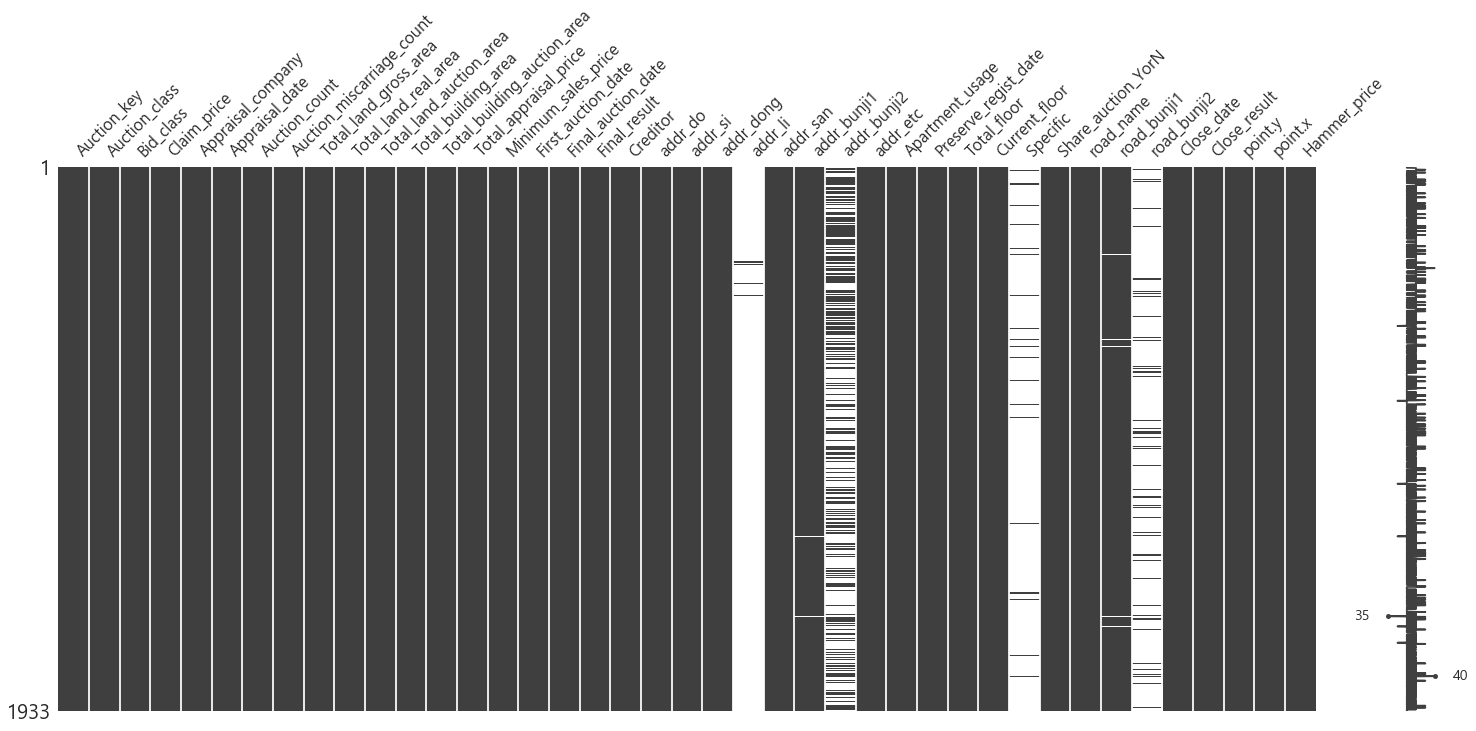

In [10]:
# 결측치 시각화
# https://hong-yp-ml-records.tistory.com/14
import missingno as msno

msno.matrix(df)
plt.show()

In [11]:
# addr_li, addr_bunji1, addr_bunji2, Specific, road_bunji1, road_bunji2에서 결측치 발생

In [12]:
df['addr_li'].unique()

array([nan, '모전리', '삼성리', '교리', '용수리', '대라리', '서부리', '명례리', '동부리', '매학리'],
      dtype=object)

In [13]:
# 1) addr_li
# 서울과 부산의 특성 상 '리'의 수가 적음
# 1933개의 데이터 중 1901개의 데이터에서 결측 발생
# '리'의 아파트 경매가가 '리'가 아닌 곳에 비해 상대적으로 낮을 것으로 예상

In [14]:
# 결측치를 'Not 리'로 채우고 'Not 리'인 곳과 아닌 곳의 Hammer price 차이 확인
df2 = df.copy()
df2['addr_li'].fillna('Not 리', inplace=True)

In [15]:
df2.loc[df2['addr_li'] != 'Not 리', 'addr_li'] = '리'

In [16]:
li = df2[['addr_li','Hammer_price']].groupby('addr_li').mean()
li

,Hammer_price
addr_li,
Not 리,4.757396e+08
리,2.194524e+08


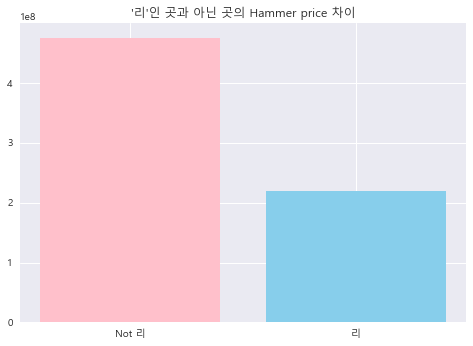

In [17]:
# 시각화 1
plt.bar(li.index,'Hammer_price', data=li, color =['pink','skyblue'])
plt.title("'리'인 곳과 아닌 곳의 Hammer price 차이")
plt.show()

In [18]:
# '리'가 아닌 곳의 경매가 평균이 더 높음을 알 수 있다

In [19]:
# 1) 첫번째 Feature 생성
df['리/Not리'] = df2['addr_li']

In [20]:
df['리/Not리'].unique()

array(['Not 리', '리'], dtype=object)

In [21]:
# addr_li 변수는 제거
del df['addr_li']

In [22]:
# 2) addr_bunji1, addr_bunji2
# 도로명 주소를 요즘에는 더 많이 쓴다는 점에서 번지 주소는 제거
del df['addr_bunji1']
del df['addr_bunji2']

In [23]:
# 3) road_bunji1
# 24개의 지번 주소를 직접 검색하여 결측치 처리
(df['road_name'] == '0').sum()

24

In [24]:
df.loc[df['road_name'] == '0', ['road_name', 'road_bunji1']]
# 'road_bunji1'이 결측치인 경우 'road_name'이 값이 모두 '0'임을 알게 됨

,road_name,road_bunji1
29,0,NaN
84,0,NaN
122,0,NaN
224,0,NaN
239,0,NaN
311,0,NaN
370,0,NaN
464,0,NaN
491,0,NaN
496,0,NaN


In [25]:
df.loc[df['road_bunji1'].isnull(), ['addr_do', 'addr_si', 'addr_dong', 'addr_etc', 'road_name', 'road_bunji1', 'road_bunji2']]

,addr_do,addr_si,addr_dong,addr_etc,road_name,road_bunji1,road_bunji2
29,부산,동래구,낙민동,",237-2 삼주 8층 801호",0,NaN,NaN
84,부산,동래구,낙민동,",237-2 삼주 7층 701호",0,NaN,NaN
122,부산,동래구,낙민동,",237-2 삼주 6층 602호",0,NaN,NaN
224,부산,동래구,낙민동,",237-2 삼주 11층 1101호",0,NaN,NaN
239,부산,동래구,낙민동,",237-2 삼주 10층 1001호",0,NaN,NaN
311,부산,동래구,낙민동,",237-2 삼주 9층 901호",0,NaN,NaN
370,부산,동래구,낙민동,",237-2 삼주 15층 1502호",0,NaN,NaN
464,부산,동래구,낙민동,",237-2 삼주 12층 1201호",0,NaN,NaN
491,부산,동래구,낙민동,",237-2 삼주 13층 1302호",0,NaN,NaN
496,부산,동래구,낙민동,",237-2 삼주 4층 401호",0,NaN,NaN


In [26]:
df.loc[[29,84,122,224,239,311,370,464,491,496,560,613,637,656,658], 'road_name'] = '충렬대로'
df.loc[[29,84,122,224,239,311,370,464,491,496,560,613,637,656,658], 'road_bunji1'] = 71

df.loc[564, 'road_name'] = '좌동순환로433번길'
df.loc[564, 'road_bunji1'] = 30

df.loc[830, 'road_name'] = '아차산로'
df.loc[830, 'road_bunji1'] = 451

df.loc[1016, 'road_name'] = '매봉로4길'
df.loc[1016, 'road_bunji1'] = 15

df.loc[1212, 'road_name'] = '한천로'
df.loc[1212, 'road_bunji1'] = 988

df.loc[1346, 'road_name'] = '우이천로'
df.loc[1346, 'road_bunji1'] = 367

df.loc[1595, 'road_name'] = '한내로'
df.loc[1595, 'road_bunji1'] = 62

df.loc[1596, 'road_name'] = '천왕로'
df.loc[1596, 'road_bunji1'] = 29

df.loc[1632, 'road_name'] = '등촌로13다길'
df.loc[1632, 'road_bunji1'] = 29

df.loc[1832, 'road_name'] = '공원로'
df.loc[1832, 'road_bunji1'] = 27

In [27]:
df['road_bunji1'].isnull().sum()

0

In [28]:
# 4) road_bunji2, Specific
# road_bunji2는 결측치가 많고 채우기 어려울 것으로 보임
# Specific 또한 특이사항에 대한 내용으로 연속형으로 변형하기 어려울 것으로 보임
# => 변수 제거
del df['road_bunji2']
del df['Specific']

In [29]:
df.isnull().sum()
# 결측치 열 모두 제거

Auction_key                    0
Auction_class                  0
Bid_class                      0
Claim_price                    0
Appraisal_company              0
Appraisal_date                 0
Auction_count                  0
Auction_miscarriage_count      0
Total_land_gross_area          0
Total_land_real_area           0
Total_land_auction_area        0
Total_building_area            0
Total_building_auction_area    0
Total_appraisal_price          0
Minimum_sales_price            0
First_auction_date             0
Final_auction_date             0
Final_result                   0
Creditor                       0
addr_do                        0
addr_si                        0
addr_dong                      0
addr_san                       0
addr_etc                       0
Apartment_usage                0
Preserve_regist_date           0
Total_floor                    0
Current_floor                  0
Share_auction_YorN             0
road_name                      0
road_bunji

# 4. 연속형 변수 간의 상관관계

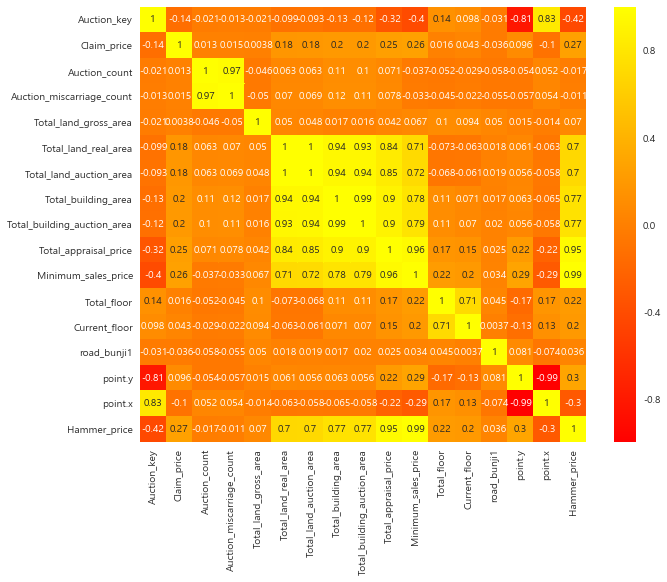

In [30]:
heat = sns.heatmap(df.corr(), annot=True, cmap='autumn')
heat.set_ylim(17, 0)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [31]:
# 데이터에서 연속형 변수들의 correlation을 나타내는 heat map을 만들었다.

# 토지 전체 면적 및 건물 면적들 간의 상관관계가 매우 높았다
# 총경매횟수와 총유찰횟수 간의 상관관계가 매우 높은데 이는 "경매횟수 - 1 = 유찰횟수"의 관계가 존재하기 때문이다
# 총건물경매면적과 토지 및 건물 면적들 간의 상관관계가 매우 높았다
# 위도와 경도의 상관관계가 매우 높은데 이것은 아파트 위치가 서울과 부산에만 해당하기 때문으로 보인다
# Total_appraisal_price, Minimum_sales_price와 Hammer_price의 상관관계가 0.95, 0.99로 매우 높음을 알 수 있다

# 5. 연속형 변수의 분포

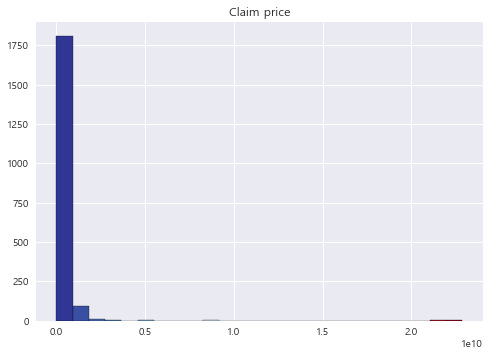

In [32]:
# histogram 그라데이션 색상으로 그리기
# https://stackoverflow.com/questions/23061657/plot-histogram-with-colors-taken-from-colormap

cm = plt.cm.get_cmap('RdYlBu_r')

# Plot histogram.
n, bins, patches = plt.hist(df['Claim_price'], bins=25, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Claim price')
plt.show()

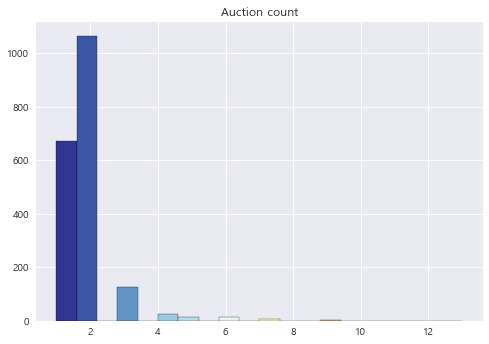

In [33]:
# Plot histogram.
n, bins, patches = plt.hist(df['Auction_count'], bins=20, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Auction count')
plt.show()

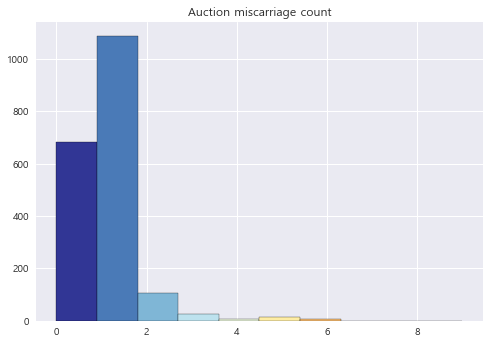

In [34]:
# Plot histogram.
n, bins, patches = plt.hist(df['Auction_miscarriage_count'], bins=10, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Auction miscarriage count')
plt.show()

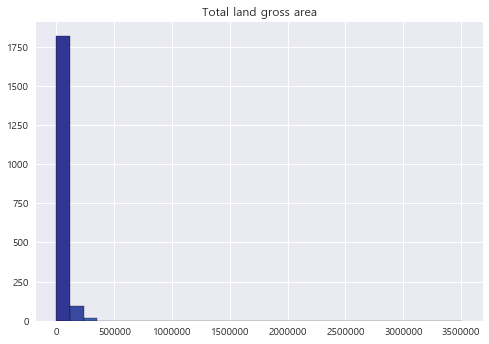

In [35]:
# Plot histogram.
n, bins, patches = plt.hist(df['Total_land_gross_area'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Total land gross area')
plt.show()

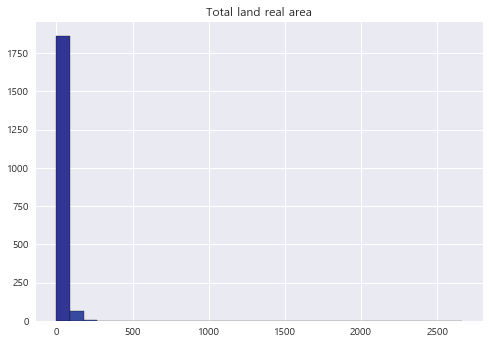

In [36]:
# Plot histogram.
n, bins, patches = plt.hist(df['Total_land_real_area'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Total land real area')
plt.show()

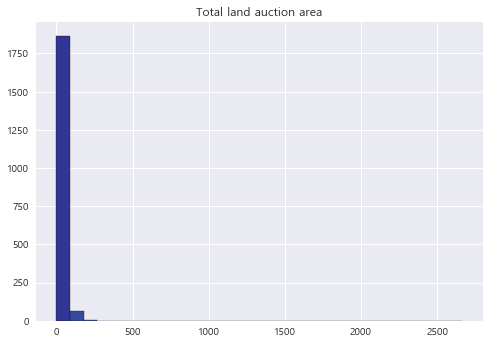

In [37]:
# Plot histogram.
n, bins, patches = plt.hist(df['Total_land_auction_area'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Total land auction area')
plt.show()

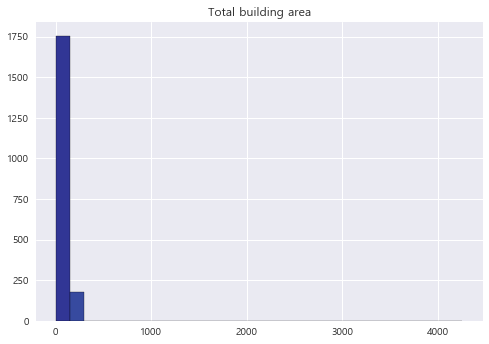

In [38]:
# Plot histogram.
n, bins, patches = plt.hist(df['Total_building_area'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Total building area')
plt.show()

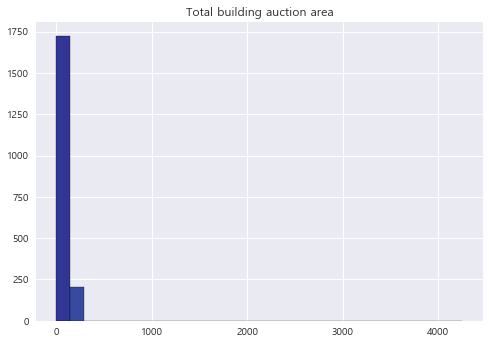

In [39]:
# Plot histogram.
n, bins, patches = plt.hist(df['Total_building_auction_area'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Total building auction area')
plt.show()

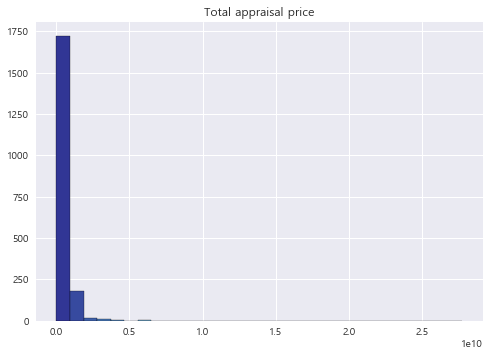

In [40]:
# Plot histogram.
n, bins, patches = plt.hist(df['Total_appraisal_price'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Total appraisal price')
plt.show()

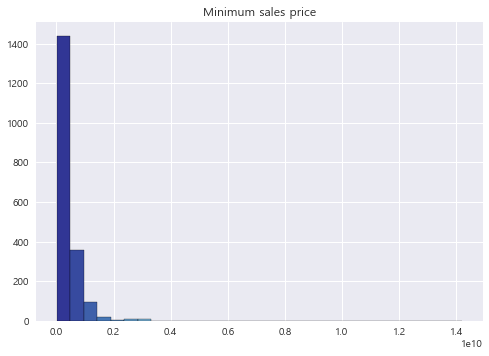

In [41]:
# Plot histogram.
n, bins, patches = plt.hist(df['Minimum_sales_price'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Minimum sales price')
plt.show()

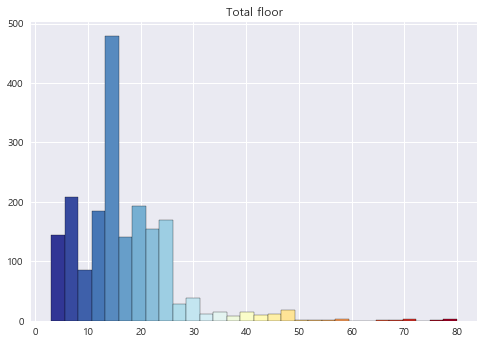

In [42]:
# Plot histogram.
n, bins, patches = plt.hist(df['Total_floor'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Total floor')
plt.show()

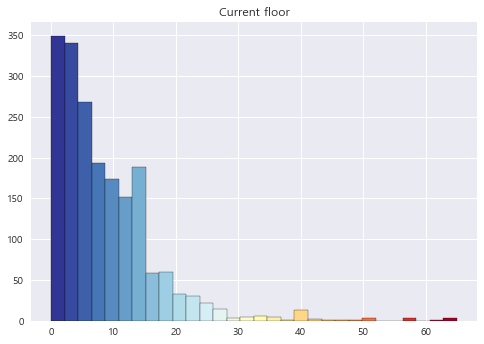

In [43]:
# Plot histogram.
n, bins, patches = plt.hist(df['Current_floor'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Current floor')
plt.show()

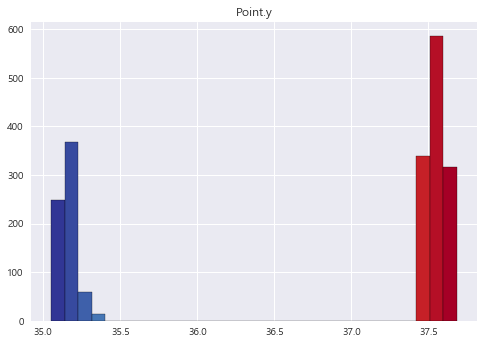

In [44]:
# Plot histogram.
n, bins, patches = plt.hist(df['point.y'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Point.y')
plt.show()

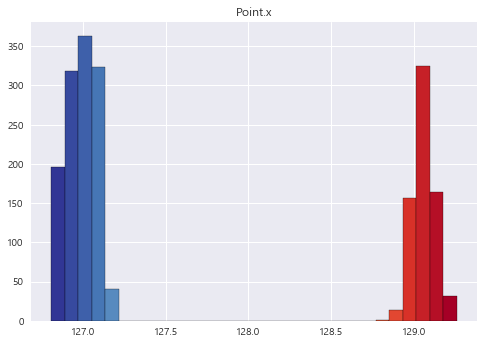

In [45]:
# Plot histogram.
n, bins, patches = plt.hist(df['point.x'], bins=30, color='green', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Point.x')
plt.show()

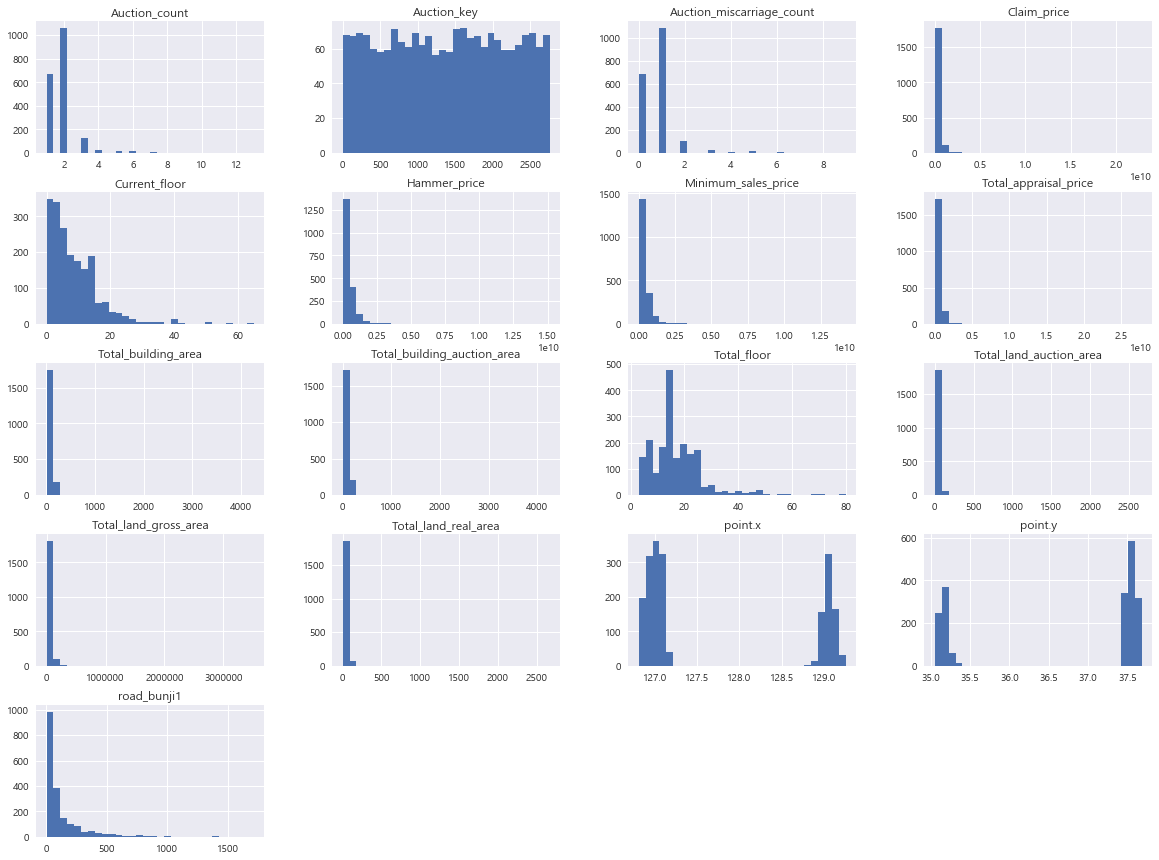

In [46]:
# 거의 모든 연속형 변수가 왼쪽에 과하게 치우친 분포임을 확인 가능
# log 변환을 하자
df.hist(bins=30, figsize=(20,15))
plt.show()

In [47]:
def log_distribution(x):
    f,ax=plt.subplots(1,2)
    
    x.hist(ax=ax[0],color='black')
    ax[0].set_title(x.name + ' 변환 전')
    
    np.log(x).hist(ax=ax[1],color='green')
    ax[1].set_title(x.name + ' 변환 후')
    plt.show()

C:\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Claim_price 는 범위 오버


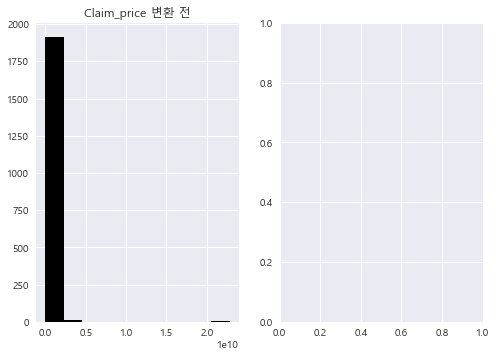

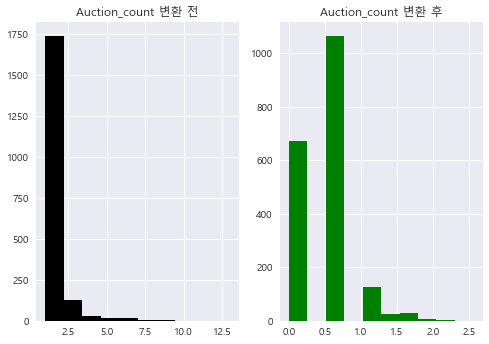

Auction_miscarriage_count 는 범위 오버
Total_land_gross_area 는 범위 오버
Total_land_real_area 는 범위 오버
Total_land_auction_area 는 범위 오버


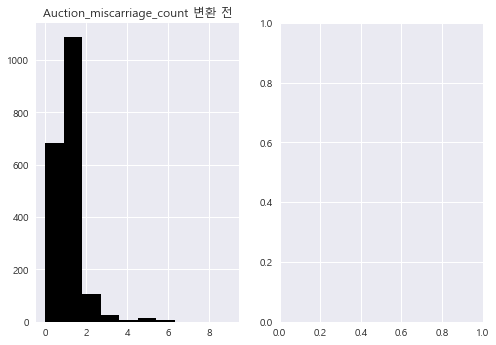

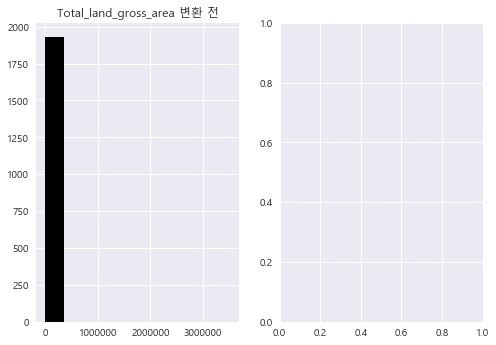

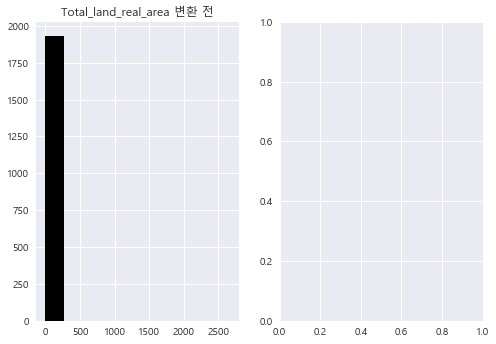

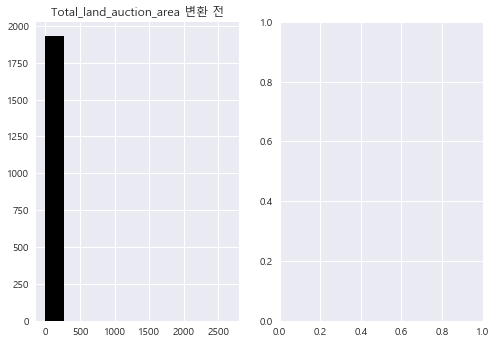

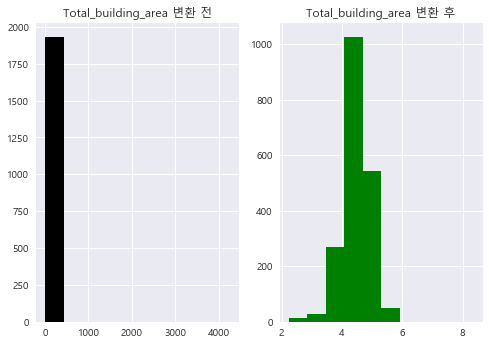

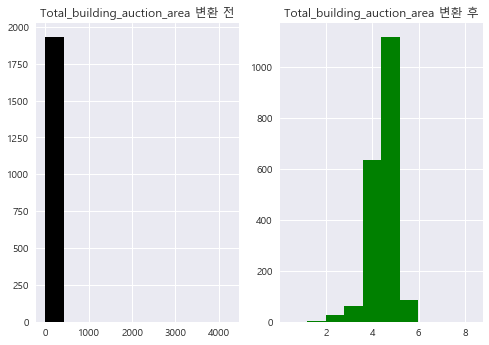

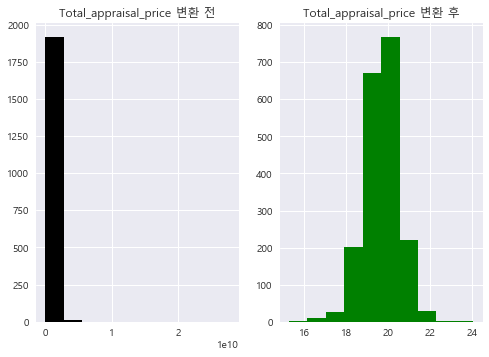

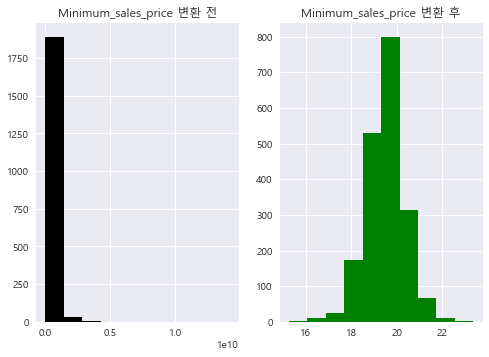

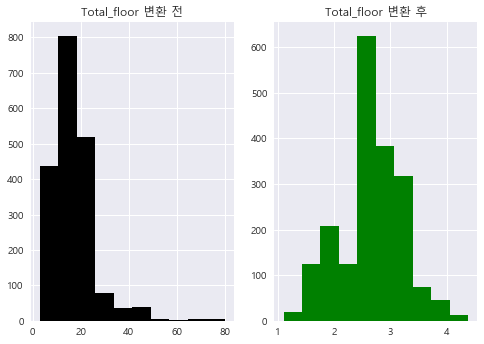

Current_floor 는 범위 오버


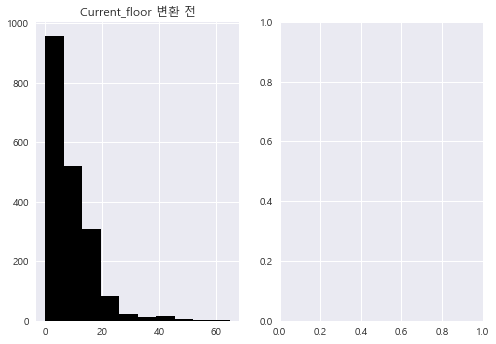

In [48]:
# 정규분포에 가깝게 변화된 것을 확인
skew=['Claim_price',
'Auction_count',
'Auction_miscarriage_count',
'Total_land_gross_area',
'Total_land_real_area',
'Total_land_auction_area',
'Total_building_area',
'Total_building_auction_area',
'Total_appraisal_price',
'Minimum_sales_price',
'Total_floor',
'Current_floor'
]

for cols in skew:
    try :
        log_distribution(df[cols])
    except:
        print(cols +' 는 범위 오버')
        
# 값에 0이 존재하는 경우는 log변환이 불가능하여 변환이 진행되지 못했다

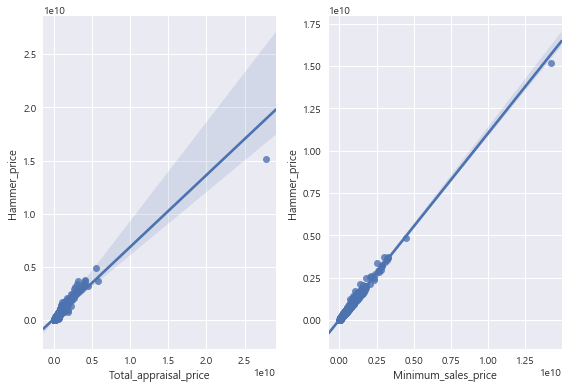

In [49]:
# 시각화 2

f, ax = plt.subplots(1,2) # 1x2 의 Figure 와 Axes

ax[0] = plt.subplot(1,2,1)
ax[0] = sns.regplot(x='Total_appraisal_price', y='Hammer_price', data=df)

ax[1] = plt.subplot(1,2,2)
ax[1] = sns.regplot(x='Minimum_sales_price', y='Hammer_price', data=df)

plt.tight_layout()
plt.show()

# Hammer price와 각각 Total_appraisal_price, Minimum_sales_price와의 상관관계를 살펴보았을 때 매우 강한 양의 상관관계가 보였다

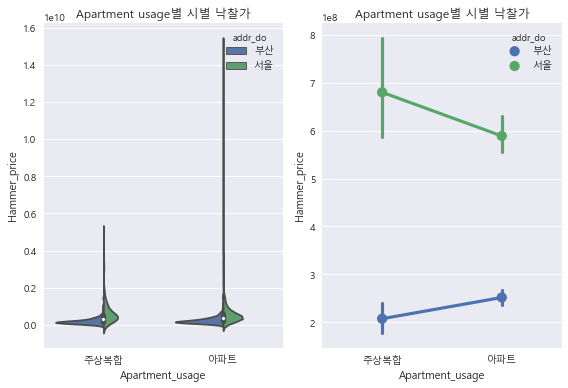

In [50]:
# 시각화 3

# violin plot
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
f, ax = plt.subplots(1,2)

ax[0] = plt.subplot(1,2,1)
ax[0] = sns.violinplot("Apartment_usage", "Hammer_price", hue="addr_do", split=True, data=df)
ax[0] = plt.title('Apartment usage별 시별 낙찰가')

ax[1] = plt.subplot(1,2,2)
ax[1] = sns.pointplot('Apartment_usage', 'Hammer_price', hue='addr_do', data=df)
ax[1] = plt.title('Apartment usage별 시별 낙찰가')

plt.tight_layout()
plt.show()

# 부산이 낙찰가가 대체로 더 낮은 경향을 보인다
# 주상복합의 경우보다 아파트의 경우 낙찰가가 대체로 더 높다
# 서울의 경우 낙찰가가 더 고르게 분포되어 있다

# 모든 건물의 용도에 대해 서울의 낙찰가가 부산의 낙찰가보다 높다
# 서울의 경우 주상복합의 낙찰가가 더 높았으나 부산의 경우 아파트의 낙찰가가 더 높다

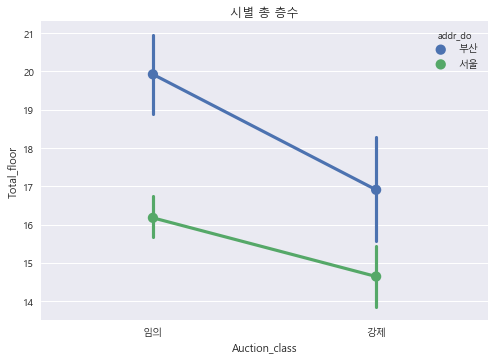

In [51]:
# 시각화 4

sns.pointplot('Auction_class','Total_floor',hue='addr_do',data=df)
plt.title('시별 총 층수')
plt.show()

# 모든 경매 종류에 대해 부산의 총층수가 서울보다 높다
# 임의 경매의 경우 총층수가 강제 경매보다 더 높다

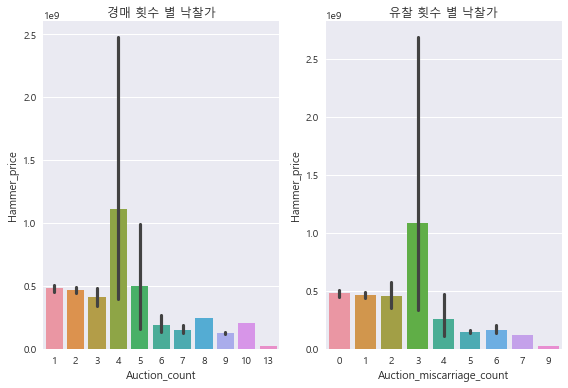

In [52]:
# 시각화 5
f, ax = plt.subplots(1,2)

ax[0] = plt.subplot(1,2,1)
ax[0] = sns.barplot("Auction_count", "Hammer_price", data=df)
ax[0] = plt.title('경매 횟수 별 낙찰가')

ax[1] = plt.subplot(1,2,2)
ax[1] = sns.barplot('Auction_miscarriage_count', 'Hammer_price', data=df)
ax[1] = plt.title('유찰 횟수 별 낙찰가')

plt.tight_layout()
plt.show()

# 대체로 총 경매횟수 (총 유찰횟수)가 늘어날수록 낙찰가가 줄어드는 경향을 보였으나
# 총 경매횟수가 4 (총 유찰횟수 = 총 경매횟수 - 1 = 3)인 경우 낙찰가가 특히 높았다

In [53]:
df.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_san', 'addr_etc', 'Apartment_usage',
       'Preserve_regist_date', 'Total_floor', 'Current_floor',
       'Share_auction_YorN', 'road_name', 'road_bunji1', 'Close_date',
       'Close_result', 'point.y', 'point.x', 'Hammer_price', '리/Not리'],
      dtype='object')

# 6. Feature 생성

In [54]:
df['Appraisal_date'] = pd.to_datetime(df['Appraisal_date'])
df['First_auction_date'] = pd.to_datetime(df['First_auction_date'])
df['Final_auction_date'] = pd.to_datetime(df['Final_auction_date'])

# 날짜 변수를 str type에서 datetime type으로 변경

In [55]:
# 종국일자
# df['Close_date'] = pd.to_datetime(df['Close_date']) 
# 보존등기일, 건물을 신축하고 처음으로 등기
# df['Preserve_regist_date'] = pd.to_datetime(df['Preserve_regist_date']) 

# '1111-11-11 00:00:00'와 같이 이상한 날짜 존재

In [56]:
# Close result의 결과가 배당이 아닌 경우에는 Close_date가 존재하지 않음을 알 수 있다.

df['Close_date'] = pd.to_datetime(df['Close_date'], errors='coerce') 
df['Preserve_regist_date'] = pd.to_datetime(df['Preserve_regist_date'], errors='coerce') 
# errors='coerce' option을 통해 error가 나는 경우 NaN 입력

In [57]:
# 2) 두번째 Feature 생성
df['경매기간'] = pd.Series(delta.days for delta in (df['Final_auction_date'] - df['First_auction_date']))
df['경매기간'].head()

0     35
1     35
2     77
3    105
4     28
Name: 경매기간, dtype: int64

In [58]:
# 3) 세번째 Feature 생성
df['등기연도'] = df['Preserve_regist_date'].map(lambda x: x.year)
df['등기연도'].head()

0    2009.0
1    2011.0
2    1992.0
3    2001.0
4    2001.0
Name: 등기연도, dtype: float64

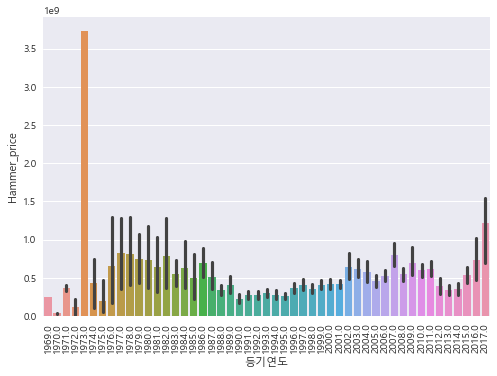

In [59]:
# 시각화 6
g = sns.barplot('등기연도', 'Hammer_price', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90) # 연도 label이 겹쳐져 세로로 label을 볼 수 있도록 설정
plt.show()

# 건물 등기 연도별 낙찰가를 비교해보았다.
# 1973년에 등기한 건물의 낙찰가가 높았으며 그 외에는 낙찰가가 연도와 상관 없어 보인다

In [60]:
# 4) 네번째 Feature 생성
df['감정연도'] = df['Appraisal_date'].map(lambda x: x.year)
df['감정연도'].head()

0    2017
1    2016
2    2016
3    2016
4    2016
Name: 감정연도, dtype: int64

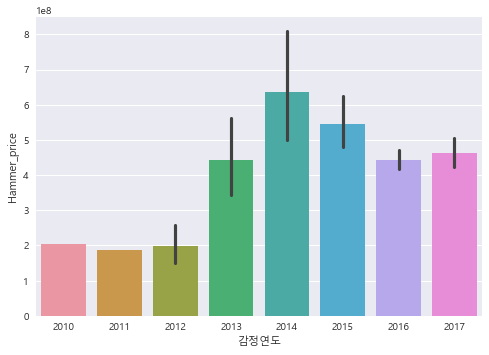

In [61]:
# 시각화 6
g = sns.barplot('감정연도', 'Hammer_price', data=df)
plt.show()

# 감정 연도별 낙찰가를 비교해보았다.
# 2014년에 대체로 높은 낙찰가를 보였으며 2012년에서 2013년 사이에 낙찰가가 많이 상승했음을 알 수 있다

In [62]:
# 5) 다섯번째 Feature 생성
df['층비율'] = df['Current_floor'] / df['Total_floor']

# 건물마다 모두 층이 다르므로 건물 총 층수 대비 현재 층수의 비율을 구하는 변수를 생성하였다

In [63]:
# 6) 여섯번째 Feature 생성

# 건폐율 = 건축면적 / 대지면적
# 건폐율이 클수록 대지면적에 비해 건축면적의 비율이 높다는 것이므로
# 건폐율이 클수록 건물을 넓게 지을 수 있어 그만큼 대지를 효율적으로 이용할 수 있음
# 건폐율이 낮을 수록 쾌적한 단지 환경이라고 할 수 있음
df['건폐율'] = df['Total_building_area'] / df['Total_land_gross_area']

In [64]:
# 7) 일곱번째 Feature 생성

# 용적률 = 연면적 / 대지면적
# 건물을 얼마나 높이, 몇 층까지 지을 수 있는지의 판단 기준
# 대지면적에 대한 건축물의 연면적 비율
# 연면적은 각 층 바닥면적의 총 합계
df['용적률'] = df['Total_building_area'] * df['Total_floor'] / df['Total_land_gross_area']

In [65]:
# 8) 여덟번째 Feature 생성

def floor(x):
    if x == 1:
        return 1
    elif x <= 15:
        return 2
    elif x <= 25:
        return 3
    else:
        return 4
    
df['층그룹'] = df['Current_floor'].apply(floor)
# 경매할 건물 층수를 4개 그룹으로 변환

In [66]:
# 9) 아홉번째 Feature 생성

def binary_do(x):
    if x == '서울':
        return 1
    else:
        return 0
    
df['서울/부산'] = df['addr_do'].apply(binary_do)
# 서울인 경우와 부산인 경우를 이진 변수로 변환
# 서울인 경우 1, 부산인 경우 0

In [67]:
# 10) 열번째 Feature 생성

pd.set_option('max_rows', 500) 
df['Creditor'].groupby(df.Creditor).count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
# 빈도수가 높은 10개의 Creditor를 뽑아보았다

,Creditor,count
37,Private,483
76,국민은행,119
295,우리은행,96
355,중소기업은행,95
400,하나은행,66
249,신한은행,58
170,부산은행,50
418,한국주택금융공사,42
245,신용보증기금,39
436,현대캐피탈,32


In [68]:
a = df['Creditor'].groupby(df.Creditor).count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)['Creditor']
a = pd.np.array(a)
a

array(['Private', '국민은행', '우리은행', '중소기업은행', '하나은행', '신한은행', '부산은행',
       '한국주택금융공사', '신용보증기금', '현대캐피탈'], dtype=object)

In [69]:
# 주요 Creditor 9개와 Private, 그리고 그를 제외한 Creditor로 나누는 변수를 생성하기로 하였다.
def creditor_fun(x):
    if x not in a:
        return '그외'
    else:
        return x
    
df['채권자'] = df['Creditor'].apply(creditor_fun)

In [70]:
df.columns[-10:]
# 10개의 새로운 Feature가 생성되었음을 확인할 수 있다

Index(['리/Not리', '경매기간', '등기연도', '감정연도', '층비율', '건폐율', '용적률', '층그룹', '서울/부산',
       '채권자'],
      dtype='object')